<a href="https://colab.research.google.com/github/JuanFelipeOrdonez/Procesamiento-digital-de-senales/blob/main/PDS_5_band_Equalizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dsp-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.1 MB/s eta 0:00:00


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

In [ ]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

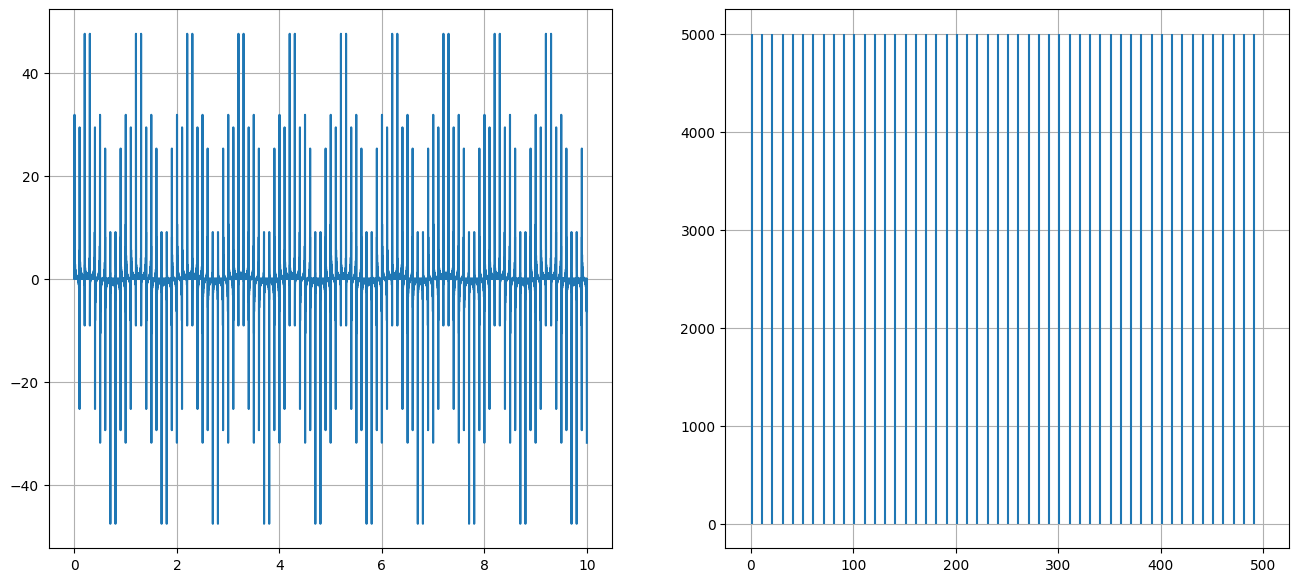

In [ ]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

In [ ]:
@interact(fc1=(20, 500, 10), wb1=(10, 250, 10), gain1=(-10, 10, 1),
          fc2=(20, 500, 10), wb2=(10, 250, 10), gain2=(-10, 10, 1),
          fc3=(20, 500, 10), wb3=(10, 250, 10), gain3=(-10, 10, 1),
          fc4=(20, 500, 10), wb4=(10, 250, 10), gain4=(-10, 10, 1),
          fc5=(20, 500, 10), wb5=(10, 250, 10), gain5=(-10, 10, 1))

def equalizer(fc1=100, wb1=10, gain1=0, fc2=200, wb2=10, gain2=0,
              fc3=300, wb3=10, gain3=0, fc4=400, wb4=10, gain4=0,
              fc5=500, wb5=10, gain5=0):
    sample_rate = generador.sampling_rate

    # Establecer los límites de las frecuencias
    f0_1, f1_1 = max(fc1 - wb1, 0.1), min(fc1 + wb1, sample_rate / 2 - 0.1)
    f0_2, f1_2 = max(fc2 - wb2, 0.1), min(fc2 + wb2, sample_rate / 2 - 0.1)
    f0_3, f1_3 = max(fc3 - wb3, 0.1), min(fc3 + wb3, sample_rate / 2 - 0.1)
    f0_4, f1_4 = max(fc4 - wb4, 0.1), min(fc4 + wb4, sample_rate / 2 - 0.1)
    f0_5, f1_5 = max(fc5 - wb5, 0.1), min(fc5 + wb5, sample_rate / 2 - 0.1)

    # Filtrar las señales para cada banda
    signal_filtered_1 = filter_(signal, f0_1, f1_1, sample_rate)
    signal_filtered_2 = filter_(signal, f0_2, f1_2, sample_rate)
    signal_filtered_3 = filter_(signal, f0_3, f1_3, sample_rate)
    signal_filtered_4 = filter_(signal, f0_4, f1_4, sample_rate)
    signal_filtered_5 = filter_(signal, f0_5, f1_5, sample_rate)

    # Aplicar las ganancias a cada banda
    signal_equalized = (signal - signal_filtered_1) + (signal_filtered_1 * np.power(10, (gain1 / 20)))
    signal_equalized += (signal - signal_filtered_2) + (signal_filtered_2 * np.power(10, (gain2 / 20)))
    signal_equalized += (signal - signal_filtered_3) + (signal_filtered_3 * np.power(10, (gain3 / 20)))
    signal_equalized += (signal - signal_filtered_4) + (signal_filtered_4 * np.power(10, (gain4 / 20)))
    signal_equalized += (signal - signal_filtered_5) + (signal_filtered_5 * np.power(10, (gain5 / 20)))

    # Mostrar la señal ecualizada
    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

interactive(children=(IntSlider(value=100, description='fc1', max=500, min=20, step=10), IntSlider(value=10, d…